## PCA: Principal Component Analysis

# What is principal component analysis?
- PCA is a technique used for dimensionality reduction.
- PCA components are new axes in the feature space that capture the most variance in the data.
- PCA transforms the original data into set of linearly uncorrelated variables, ranked by how much variance each capture. 

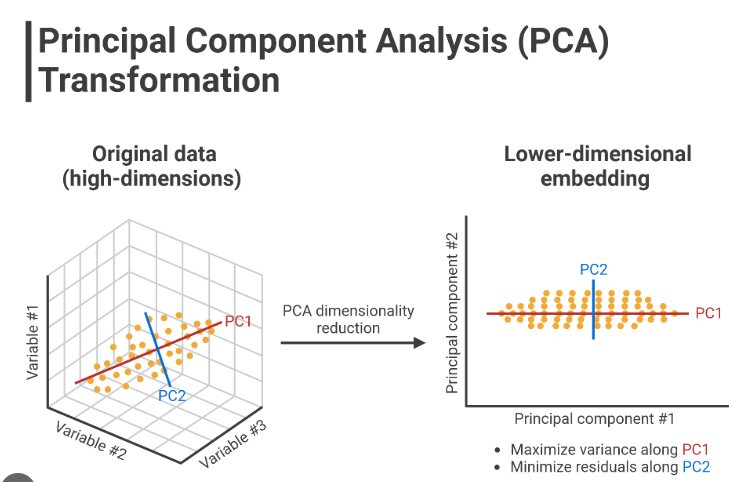

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [2]:
# Load dataset 
data = load_wine(as_frame=True)
X = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target, name = 'class')

print(X.head())
print(y.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

fit computes the mean and stdev to be used for later scaling, note it's just a computation with no scaling done.

transform uses the previously computed mean and stdev to scale the data (subtract mean from all values and then divide it by stdev).

fit_transform does both at the same time. So you can do it with just 1 line of code.

In [3]:
# Standarized the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# apply PCA 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
# Explained Variance Ration
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 ])

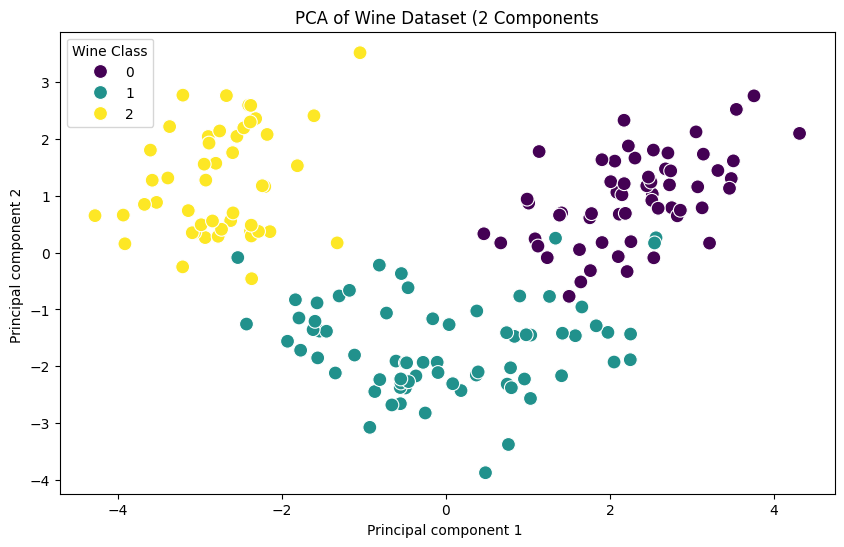

In [6]:
# Visualize the result 

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['class'] = y

plt.figure(figsize= (10, 6))
sns.scatterplot(x= 'PC1', y = 'PC2', hue = 'class', data = X_pca_df, palette='viridis', s = 100)
plt.title("PCA of Wine Dataset (2 Components")
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
plt.legend(title = "Wine Class")
plt.show()

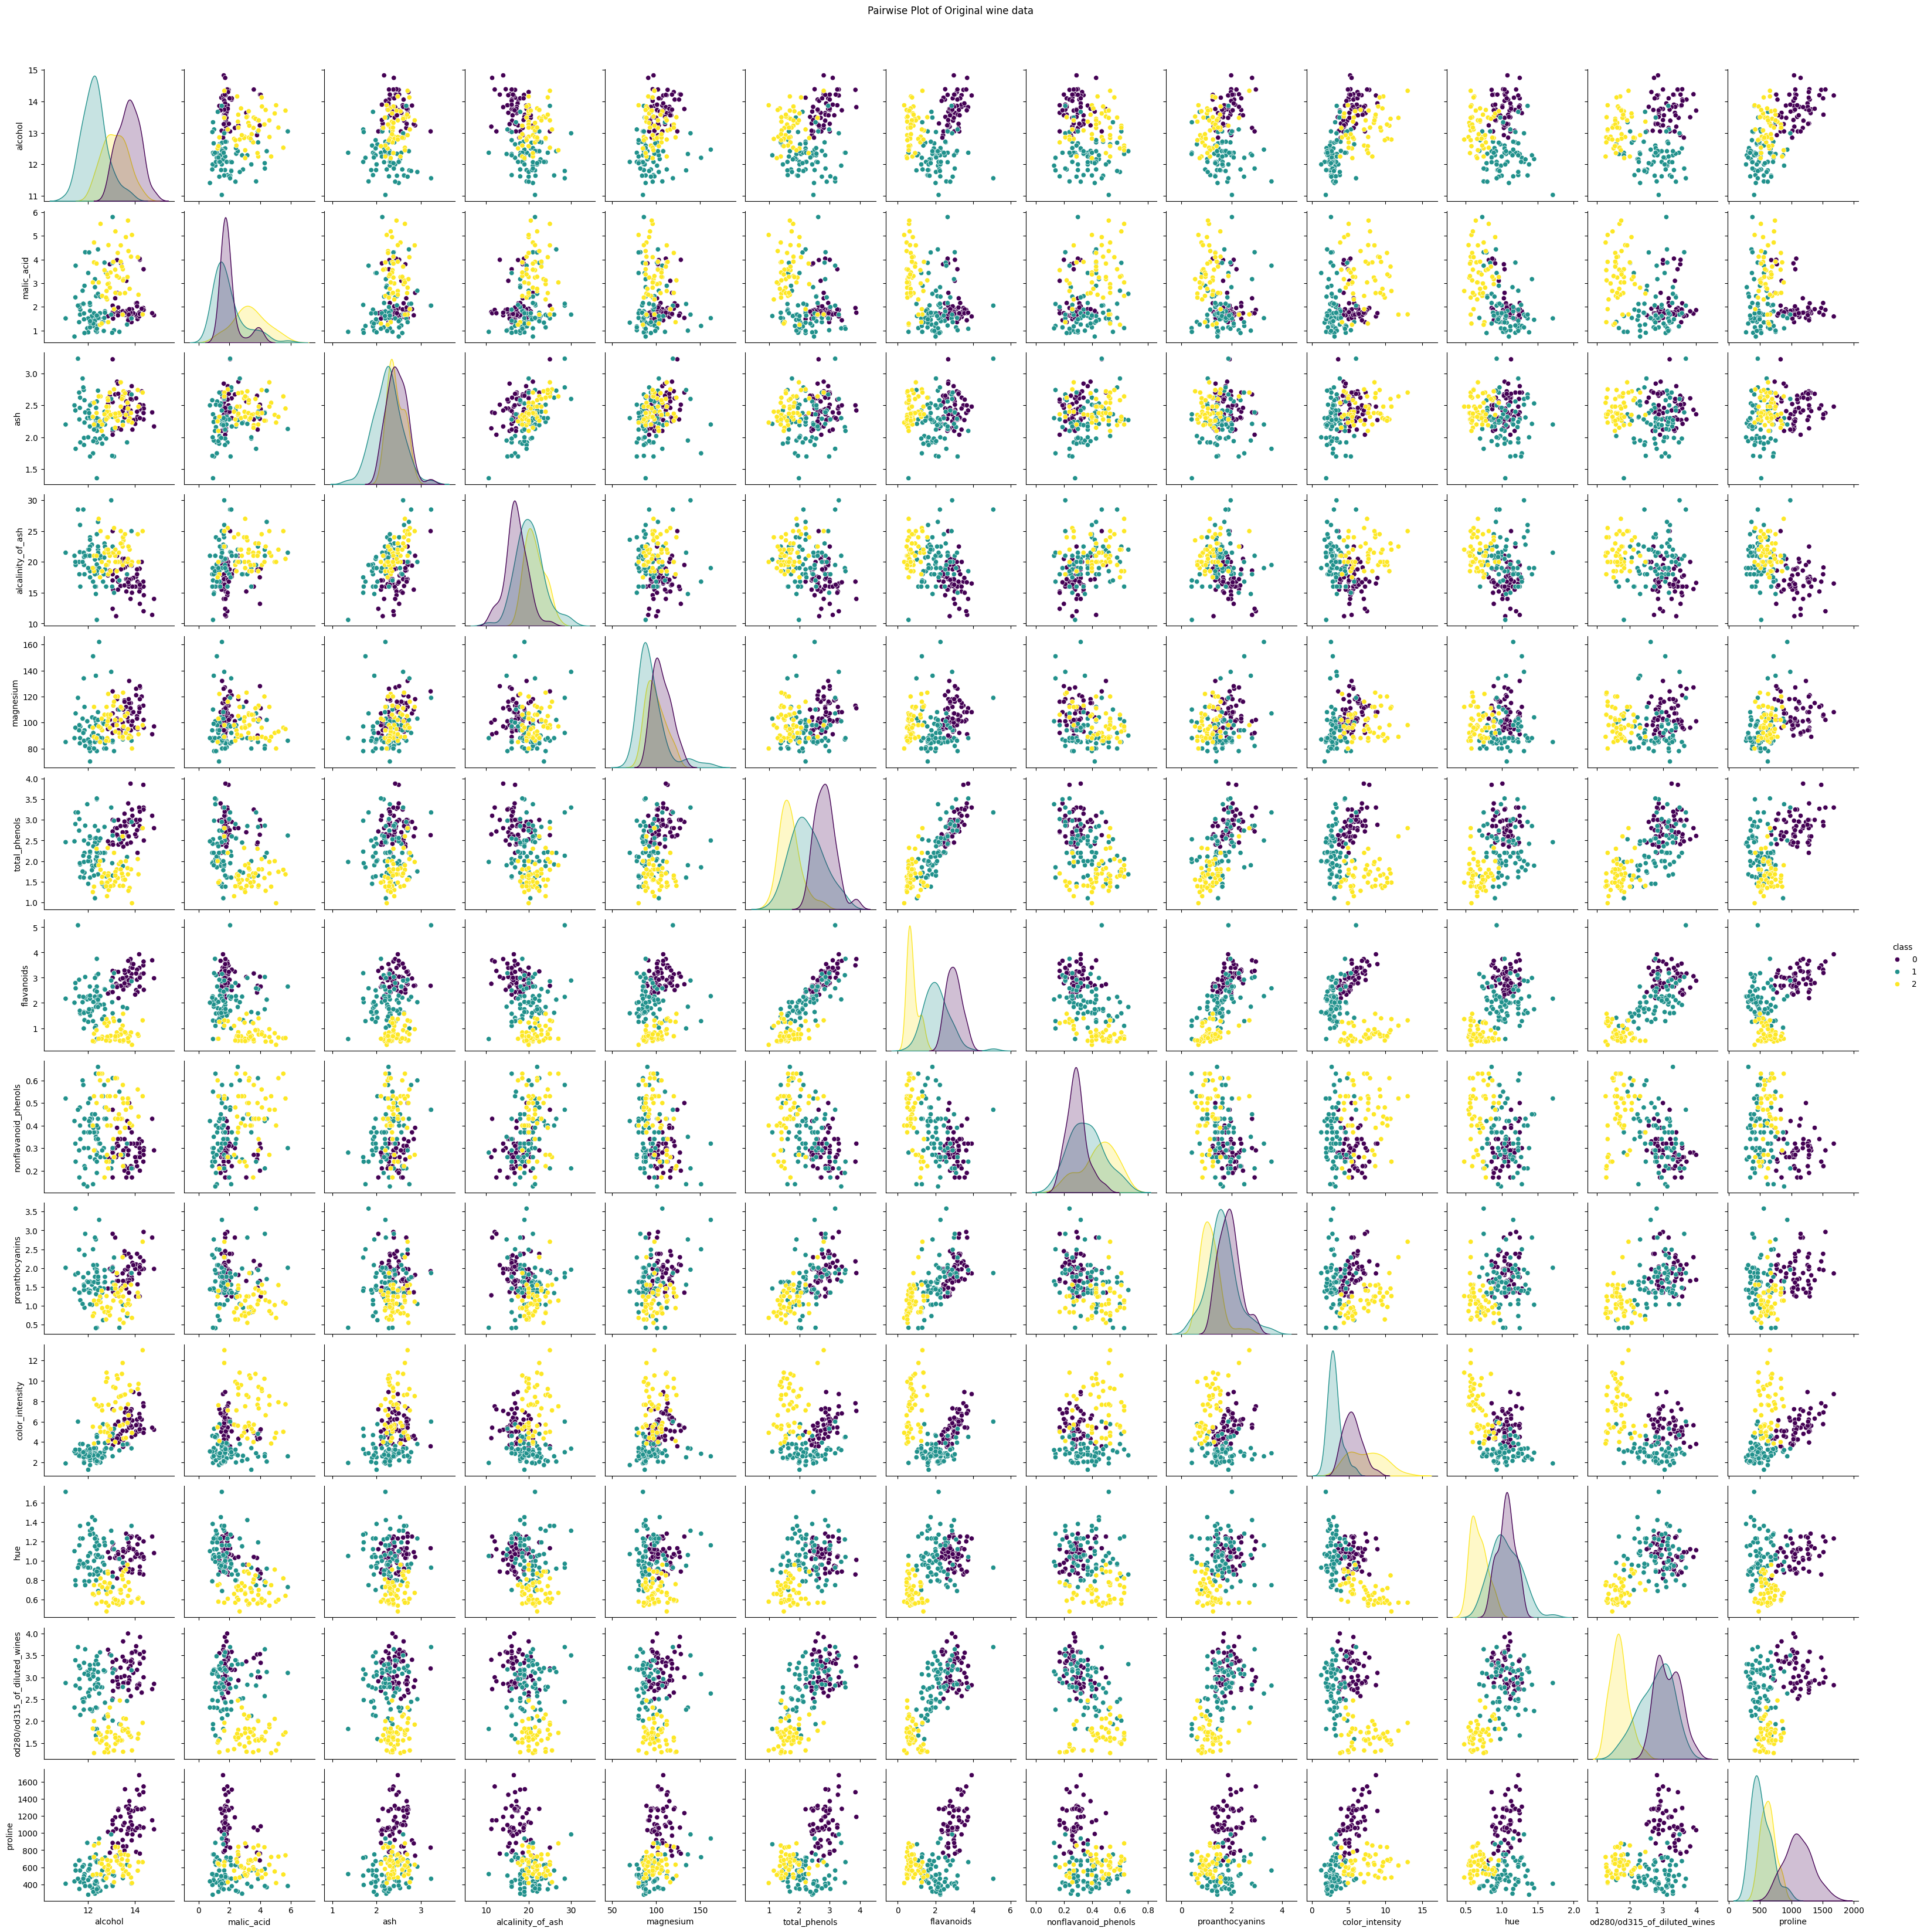

In [7]:
# Visualizing original dataset 

X['class'] = y
X = X.replace([np.nan, -np.inf], 0)
sns.pairplot(X, hue = 'class', palette='viridis')
plt.suptitle("Pairwise Plot of Original wine data ", y = 1.02)
plt.show()

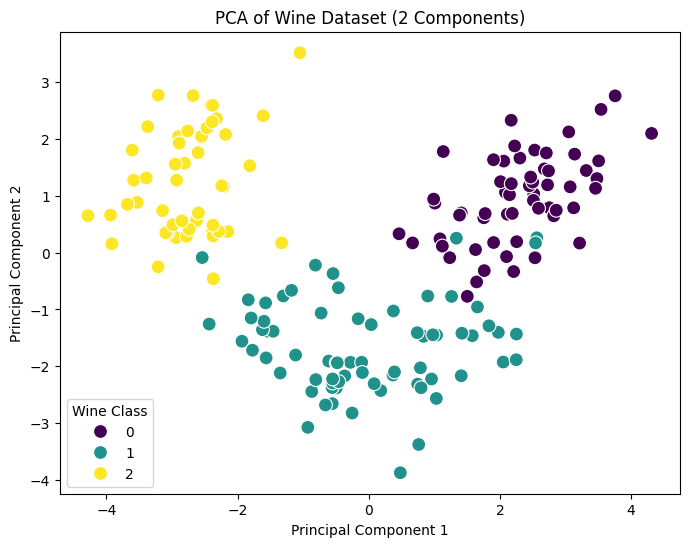

In [8]:
#Visualizing PCA-transformed data (Already done above)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=X_pca_df, palette='viridis', s=100)
plt.title('PCA of Wine Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class')
plt.show()
